## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 1 : Explore the descriptive statistics on the dataset.

## imports

In [122]:
import pandas
import numpy
import statistics
import scipy.stats
import matplotlib.pyplot as pyplot
import warnings

## Configurations

In [123]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (5, 3)

In [124]:
warnings.filterwarnings('ignore')

In [125]:
Data=pandas.read_csv("../Data/Raw_Data/16_01_2023_WorldWide.csv")

In [126]:
Selected_Columns=['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths','population']

In [127]:
Data=Data[Selected_Columns]

In [128]:
Numerical_Columns=Data.describe().columns

In [129]:
Data=Data.sort_values(by="total_cases",ascending=False)

# Data Exploration

## Initial lookup

In [105]:
Data.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
233,OWID_WRL,NaN,World,2023-01-16,666879519.0,195295.0,6723297.0,814.0,7.975105e+09
91,OWID_HIC,NaN,High income,2023-01-16,423860182.0,177208.0,2813965.0,618.0,1.250515e+09
69,OWID_EUR,NaN,Europe,2023-01-15,245913988.0,7266.0,2012174.0,64.0,7.448078e+08
11,OWID_ASI,NaN,Asia,2023-01-16,207134786.0,151942.0,1526561.0,576.0,4.721383e+09
70,OWID_EUN,NaN,European Union,2023-01-15,182467840.0,1981.0,1199738.0,13.0,4.501468e+08


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 233 to 231
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           237 non-null    object 
 1   continent          224 non-null    object 
 2   location           237 non-null    object 
 3   last_updated_date  237 non-null    object 
 4   total_cases        231 non-null    float64
 5   new_cases          231 non-null    float64
 6   total_deaths       227 non-null    float64
 7   new_deaths         227 non-null    float64
 8   population         236 non-null    float64
dtypes: float64(5), object(4)
memory usage: 18.5+ KB


In [13]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,2.310000e+02,231.000000,2.270000e+02,227.000000,2.360000e+02
mean,1.233744e+07,4587.558442,1.237569e+05,34.096916,1.371974e+08
std,5.887474e+07,22147.187638,5.664904e+05,133.423968,6.832297e+08
min,1.000000e+00,0.000000,1.000000e+00,0.000000,8.080000e+02
25%,3.212200e+04,0.000000,2.965000e+02,0.000000,8.297690e+05
50%,2.855350e+05,0.000000,3.164000e+03,0.000000,6.909971e+06
75%,2.174490e+06,305.500000,2.046450e+04,1.000000,3.353106e+07
max,6.668795e+08,195295.000000,6.723297e+06,1018.000000,7.975105e+09


In [14]:
Data.describe(include="all")

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
count,237,224,237,237,2.310000e+02,231.000000,2.270000e+02,227.000000,2.360000e+02
unique,237,6,237,7,NaN,NaN,NaN,NaN,NaN
top,OWID_WRL,Africa,World,2023-01-15,NaN,NaN,NaN,NaN,NaN
freq,1,55,1,215,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.233744e+07,4587.558442,1.237569e+05,34.096916,1.371974e+08
std,NaN,NaN,NaN,NaN,5.887474e+07,22147.187638,5.664904e+05,133.423968,6.832297e+08
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,1.000000e+00,0.000000,8.080000e+02
25%,NaN,NaN,NaN,NaN,3.212200e+04,0.000000,2.965000e+02,0.000000,8.297690e+05
50%,NaN,NaN,NaN,NaN,2.855350e+05,0.000000,3.164000e+03,0.000000,6.909971e+06
75%,NaN,NaN,NaN,NaN,2.174490e+06,305.500000,2.046450e+04,1.000000,3.353106e+07


## Data Reduction

here some countries have NULL Values in their specific columns, so dropping the columns without filling it

In [15]:
Data.isnull().any()

iso_code             False
continent             True
location             False
last_updated_date    False
total_cases           True
new_cases             True
total_deaths          True
new_deaths            True
population            True
dtype: bool

In [16]:
Data.isnull().sum()

iso_code              0
continent            13
location              0
last_updated_date     0
total_cases           6
new_cases             6
total_deaths         10
new_deaths           10
population            1
dtype: int64

In [17]:
Data=Data.dropna()

In [103]:
Data.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
233,OWID_WRL,NaN,World,2023-01-16,666879519.0,195295.0,6723297.0,814.0,7.975105e+09
91,OWID_HIC,NaN,High income,2023-01-16,423860182.0,177208.0,2813965.0,618.0,1.250515e+09
69,OWID_EUR,NaN,Europe,2023-01-15,245913988.0,7266.0,2012174.0,64.0,7.448078e+08
11,OWID_ASI,NaN,Asia,2023-01-16,207134786.0,151942.0,1526561.0,576.0,4.721383e+09
70,OWID_EUN,NaN,European Union,2023-01-15,182467840.0,1981.0,1199738.0,13.0,4.501468e+08


In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 223 to 156
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           214 non-null    object 
 1   continent          214 non-null    object 
 2   location           214 non-null    object 
 3   last_updated_date  214 non-null    object 
 4   total_cases        214 non-null    float64
 5   new_cases          214 non-null    float64
 6   total_deaths       214 non-null    float64
 7   new_deaths         214 non-null    float64
 8   population         214 non-null    float64
dtypes: float64(5), object(4)
memory usage: 16.7+ KB


In [21]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02
mean,3.116224e+06,2204.953271,3.141721e+04,24.696262,3.721731e+07
std,9.656967e+06,10433.607141,1.061432e+05,113.340553,1.426430e+08
min,1.000000e+00,0.000000,1.000000e+00,0.000000,4.413000e+03
25%,3.307125e+04,0.000000,2.832500e+02,0.000000,8.515890e+05
50%,2.688750e+05,0.000000,2.794500e+03,0.000000,6.797150e+06
75%,1.485466e+06,221.750000,1.669100e+04,0.000000,2.620034e+07
max,1.016488e+08,108281.000000,1.099860e+06,1018.000000,1.425887e+09


In [20]:
Data.describe(include="all")

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
count,214,214,214,214,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02
unique,214,6,214,2,NaN,NaN,NaN,NaN,NaN
top,USA,Africa,United States,2023-01-15,NaN,NaN,NaN,NaN,NaN
freq,1,54,1,204,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.116224e+06,2204.953271,3.141721e+04,24.696262,3.721731e+07
std,NaN,NaN,NaN,NaN,9.656967e+06,10433.607141,1.061432e+05,113.340553,1.426430e+08
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,1.000000e+00,0.000000,4.413000e+03
25%,NaN,NaN,NaN,NaN,3.307125e+04,0.000000,2.832500e+02,0.000000,8.515890e+05
50%,NaN,NaN,NaN,NaN,2.688750e+05,0.000000,2.794500e+03,0.000000,6.797150e+06
75%,NaN,NaN,NaN,NaN,1.485466e+06,221.750000,1.669100e+04,0.000000,2.620034e+07


# Descriptive statistics 

## Mean

## Median

In [38]:
Data.mean()

total_cases     1.233744e+07
new_cases       4.587558e+03
total_deaths    1.237569e+05
new_deaths      3.409692e+01
population      1.371974e+08
dtype: float64

In [39]:
Data.median()

total_cases      285535.0
new_cases             0.0
total_deaths       3164.0
new_deaths            0.0
population      6909971.0
dtype: float64

## Mode

In [40]:
Data.mode()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
0,ABW,Africa,Afghanistan,2023-01-15,1.0,0.0,1.0,0.0,8.080000e+02
1,AFG,NaN,Africa,NaN,29.0,NaN,17.0,NaN,3.801000e+03
2,AGO,NaN,Albania,NaN,721.0,NaN,21.0,NaN,4.413000e+03
3,AIA,NaN,Algeria,NaN,1403.0,NaN,121.0,NaN,5.401000e+03
4,ALB,NaN,Andorra,NaN,1930.0,NaN,138.0,NaN,5.885000e+03
...,...,...,...,...,...,...,...,...,...
232,WSM,NaN,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,2.525921e+09
233,YEM,NaN,World,NaN,NaN,NaN,NaN,NaN,3.432097e+09
234,ZAF,NaN,Yemen,NaN,NaN,NaN,NaN,NaN,4.721383e+09
235,ZMB,NaN,Zambia,NaN,NaN,NaN,NaN,NaN,7.975105e+09


## Quantile Ranges

In [41]:
Data.quantile(0.25)

total_cases      32122.0
new_cases            0.0
total_deaths       296.5
new_deaths           0.0
population      829769.0
Name: 0.25, dtype: float64

In [42]:
Data.quantile(0.75)

total_cases      2174490.5
new_cases            305.5
total_deaths       20464.5
new_deaths             1.0
population      33531055.5
Name: 0.75, dtype: float64

In [43]:
Inter_quartile_range=Data.quantile(0.75)-Data.quantile(0.25)

In [44]:
Inter_quartile_range

total_cases      2142368.5
new_cases            305.5
total_deaths       20168.0
new_deaths             1.0
population      32701286.5
dtype: float64

## Harmonic Mean

## Geometric Mean

In [45]:
[
    Numerical_Columns[i]+": "+str(statistics.harmonic_mean(Data[Numerical_Columns[i]])) for i in range(len(Numerical_Columns))
]

['total_cases: nan',
 'new_cases: 0',
 'total_deaths: nan',
 'new_deaths: 0',
 'population: nan']

In [46]:
[
    Numerical_Columns[i]+": "+str(scipy.stats.mstats.gmean(Data[Numerical_Columns[i]]))  for i in range(len(Numerical_Columns))
]

['total_cases: nan',
 'new_cases: nan',
 'total_deaths: nan',
 'new_deaths: nan',
 'population: nan']

## Skewness

## Kurtosis

In [47]:
Data.skew()

total_cases     8.165961
new_cases       6.855750
total_deaths    8.320843
new_deaths      5.281220
population      8.547395
dtype: float64

In [48]:
Data.kurtosis()

total_cases     77.950882
new_cases       49.653642
total_deaths    85.636886
new_deaths      29.504134
population      84.630446
dtype: float64

## Box Plots

<AxesSubplot: >

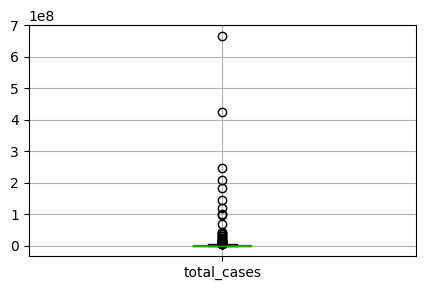

In [82]:
Data.boxplot("total_cases")

<AxesSubplot: >

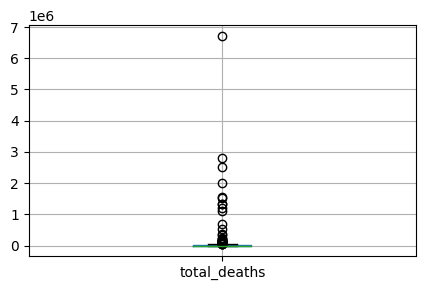

In [83]:
Data.boxplot("total_deaths")

<AxesSubplot: >

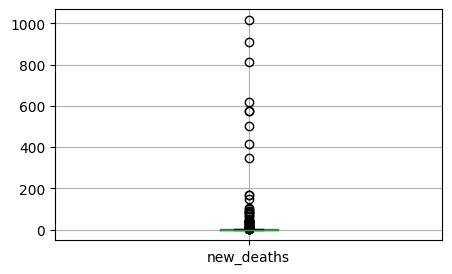

In [84]:
Data.boxplot("new_deaths")

<AxesSubplot: >

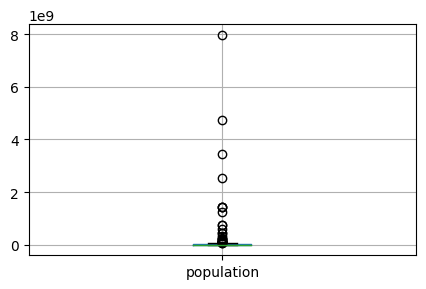

In [85]:
Data.boxplot("population")

<AxesSubplot: >

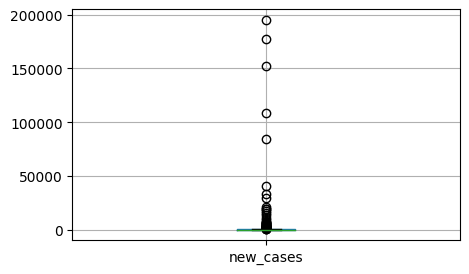

In [86]:
Data.boxplot('new_cases')

<AxesSubplot: >

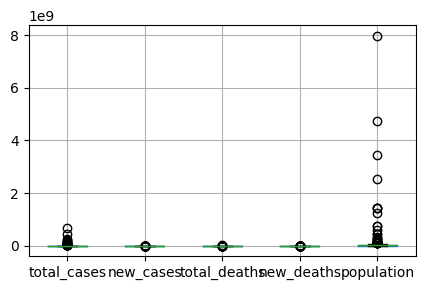

In [87]:
Data.boxplot()

## Correlation

In [55]:
Correlation_Data=Data.corr()
Correlation_Data.columns=["correlation_with_"+column for column in Numerical_Columns]

In [56]:
Correlation_Data

,correlation_with_total_cases,correlation_with_new_cases,correlation_with_total_deaths,correlation_with_new_deaths,correlation_with_population
total_cases,1.000000,0.798295,0.965605,0.539624,0.818204
new_cases,0.798295,1.000000,0.716579,0.738104,0.694869
total_deaths,0.965605,0.716579,1.000000,0.498016,0.862557
new_deaths,0.539624,0.738104,0.498016,1.000000,0.474217
population,0.818204,0.694869,0.862557,0.474217,1.000000


## Covariance

In [57]:
Covarience_data=Data.cov()
Covarience_data.columns=["covarience_with_"+column for column in Numerical_Columns]

In [58]:
Covarience_data

,covarience_with_total_cases,covarience_with_new_cases,covarience_with_total_deaths,covarience_with_new_deaths,covarience_with_population
total_cases,3.466235e+15,1.040904e+12,3.247597e+13,4.274594e+09,3.339489e+16
new_cases,1.040904e+12,4.904979e+08,9.066083e+09,2.199453e+06,1.066870e+13
total_deaths,3.247597e+13,9.066083e+09,3.209114e+11,3.764174e+07,3.416246e+14
new_deaths,4.274594e+09,2.199453e+06,3.764174e+07,1.780196e+04,4.423469e+10
population,3.339489e+16,1.066870e+13,3.416246e+14,4.423469e+10,4.668029e+17


## Bar Graph

## PieChart

<AxesSubplot: xlabel='location'>

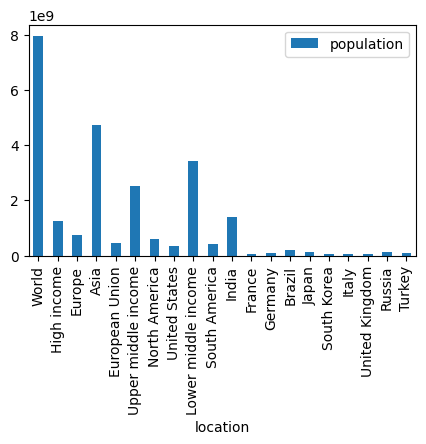

In [88]:
Data[:20].plot.bar(x='location',y=['population'])

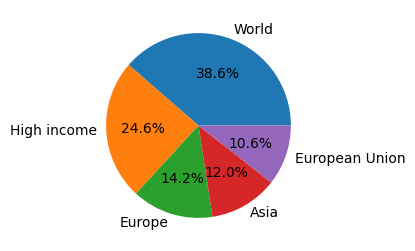

In [89]:
pyplot.pie(Data[:5]['total_cases'],labels=Data[:5]['location'],autopct='%1.1f%%')
pyplot.show()

## Line Graph

<AxesSubplot: xlabel='location'>

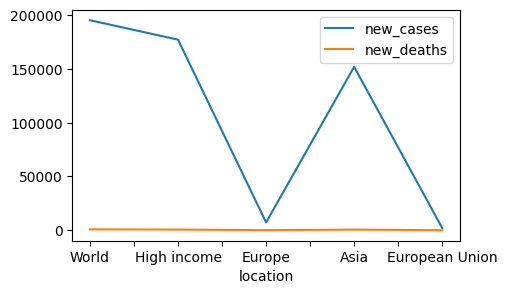

In [90]:
Data[:5].plot(kind="line",x='location',y=['new_cases','new_deaths'])

<AxesSubplot: xlabel='location'>

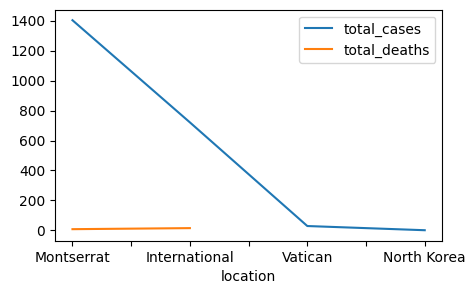

In [95]:
Data[-10:].plot(kind="line",x='location',y=['total_cases','total_deaths'])

# Gathering All Values Together

In [96]:
Statastics_Data=pandas.DataFrame()

In [97]:
Statastics_Data['mean']=Data.mean()

In [98]:
Statastics_Data['median']=Data.median()

In [99]:
Statastics_Data['skew']=Data.skew()

In [100]:
Statastics_Data['kurtosis']=Data.kurtosis()

In [101]:
Statastics_Data['first_quartile']=Data.quantile(0.25)

In [69]:
Statastics_Data['third_quartile']=Data.quantile(0.75)

In [70]:
Statastics_Data['inter_quartile_range']=Inter_quartile_range

In [71]:
Statastics_Data['max']=Data.max()[len(Numerical_Columns)-1:]

In [72]:
Statastics_Data['min']=Data.min()[len(Numerical_Columns)-1:]

In [73]:
Statastics_Data['harmonic_mean']=[
statistics.harmonic_mean(Data[Numerical_Columns[i]]) for i in range(len(Numerical_Columns))
]

In [74]:
Statastics_Data['geometric_mean']=[
scipy.stats.mstats.gmean(Data[Numerical_Columns[i]])  for i in range(len(Numerical_Columns))
]

In [75]:
Statastics_Data=pandas.concat([Statastics_Data,Correlation_Data,Covarience_data],axis=1)

In [76]:
Statastics_Data

,mean,median,skew,kurtosis,first_quartile,third_quartile,inter_quartile_range,max,min,harmonic_mean,...,correlation_with_total_cases,correlation_with_new_cases,correlation_with_total_deaths,correlation_with_new_deaths,correlation_with_population,covarience_with_total_cases,covarience_with_new_cases,covarience_with_total_deaths,covarience_with_new_deaths,covarience_with_population
total_cases,1.233744e+07,285535.0,8.165961,77.950882,32122.0,2174490.5,2142368.5,NaN,NaN,NaN,...,1.000000,0.798295,0.965605,0.539624,0.818204,3.466235e+15,1.040904e+12,3.247597e+13,4.274594e+09,3.339489e+16
new_cases,4.587558e+03,0.0,6.855750,49.653642,0.0,305.5,305.5,195295.0,0.0,0.0,...,0.798295,1.000000,0.716579,0.738104,0.694869,1.040904e+12,4.904979e+08,9.066083e+09,2.199453e+06,1.066870e+13
total_deaths,1.237569e+05,3164.0,8.320843,85.636886,296.5,20464.5,20168.0,6723297.0,1.0,NaN,...,0.965605,0.716579,1.000000,0.498016,0.862557,3.247597e+13,9.066083e+09,3.209114e+11,3.764174e+07,3.416246e+14
new_deaths,3.409692e+01,0.0,5.281220,29.504134,0.0,1.0,1.0,1018.0,0.0,0.0,...,0.539624,0.738104,0.498016,1.000000,0.474217,4.274594e+09,2.199453e+06,3.764174e+07,1.780196e+04,4.423469e+10
population,1.371974e+08,6909971.0,8.547395,84.630446,829769.0,33531055.5,32701286.5,7975105024.0,808.0,NaN,...,0.818204,0.694869,0.862557,0.474217,1.000000,3.339489e+16,1.066870e+13,3.416246e+14,4.423469e+10,4.668029e+17


In [77]:
Statastics_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, total_cases to population
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mean                           5 non-null      float64
 1   median                         5 non-null      float64
 2   skew                           5 non-null      float64
 3   kurtosis                       5 non-null      float64
 4   first_quartile                 5 non-null      float64
 5   third_quartile                 5 non-null      float64
 6   inter_quartile_range           5 non-null      float64
 7   max                            4 non-null      object 
 8   min                            4 non-null      object 
 9   harmonic_mean                  2 non-null      float64
 10  geometric_mean                 0 non-null      float64
 11  correlation_with_total_cases   5 non-null      float64
 12  correlation_with_new_cases     5 non-nul

In [78]:
Statastics_Data.iloc[1,:]

mean                                       4587.558442
median                                             0.0
skew                                           6.85575
kurtosis                                     49.653642
first_quartile                                     0.0
third_quartile                                   305.5
inter_quartile_range                             305.5
max                                           195295.0
min                                                0.0
harmonic_mean                                      0.0
geometric_mean                                     NaN
correlation_with_total_cases                  0.798295
correlation_with_new_cases                         1.0
correlation_with_total_deaths                 0.716579
correlation_with_new_deaths                   0.738104
correlation_with_population                   0.694869
covarience_with_total_cases       1040904171760.452271
covarience_with_new_cases             490497920.265048
covarience

In [79]:
list(Statastics_Data)[:11]

['mean',
 'median',
 'skew',
 'kurtosis',
 'first_quartile',
 'third_quartile',
 'inter_quartile_range',
 'max',
 'min',
 'harmonic_mean',
 'geometric_mean']

<AxesSubplot: >

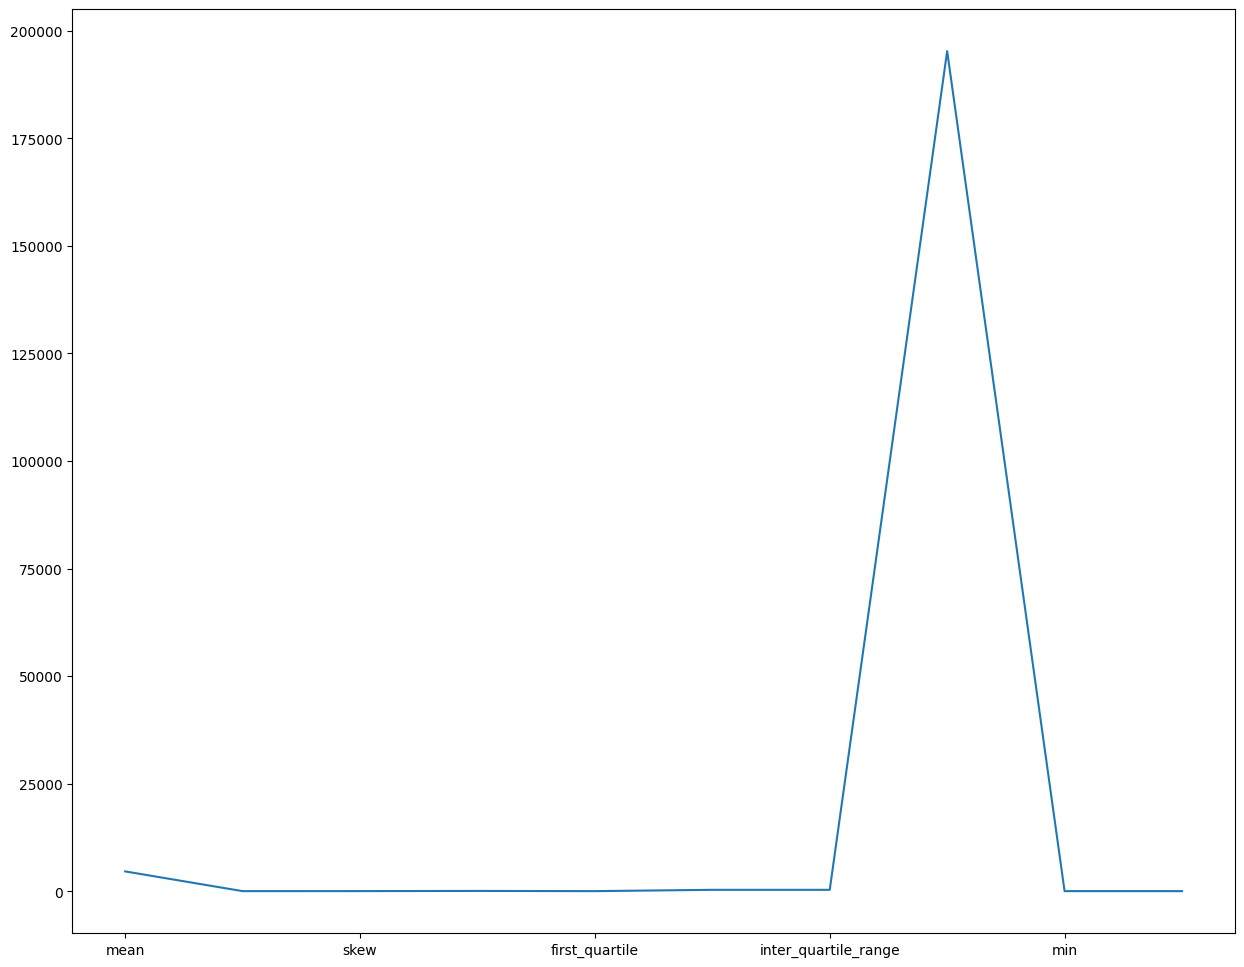

In [80]:
Statastics_Data.iloc[1,:11].plot()